#### Cody Kaminski
#### 12/14/2022
#### Final Project
#### The purpose of this is to answer questions about the data

In [205]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

In [206]:
heartDataFrame = pd.read_csv("heart_2020_cleaned.csv")

In [207]:
heartDataFrame

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


#### Which age groups suffer heart disease the most?

In [209]:
ageCategories = set()

for key, value in heartDataFrame.AgeCategory.iteritems():
    if str(value) not in ageCategories:
        ageCategories.add(str(value))
        
ageCategoryDataFrame = pd.DataFrame(columns=["AgeCategory", "PercentageYes"])

for ageCategory in ageCategories:
    currentDataFrame = heartDataFrame[heartDataFrame["AgeCategory"] == ageCategory]
    
    yesCount = len(currentDataFrame[currentDataFrame["HeartDisease"] == "Yes"])
    noCount = len(currentDataFrame[currentDataFrame["HeartDisease"] == "No"])
    totalCount = yesCount+noCount
    percentageYes = yesCount/totalCount
    
    ageCategoryDataFrame.loc[len(ageCategoryDataFrame)] = [ageCategory, percentageYes]
    
ageCategoryDataFrame = ageCategoryDataFrame.sort_values(by = "AgeCategory").reset_index(drop = True)

In [210]:
ageCategoryDataFrame

,AgeCategory,PercentageYes
0,18-24,0.006172
1,25-29,0.007844
2,30-34,0.012051
3,35-39,0.014404
4,40-44,0.023136
5,45-49,0.034143
6,50-54,0.054487
7,55-59,0.073999
8,60-64,0.098765
9,65-69,0.120084


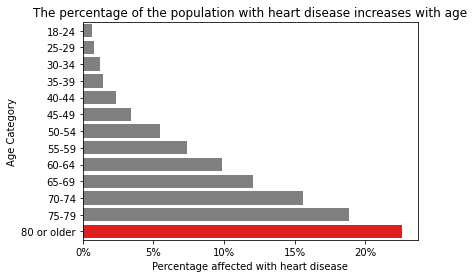

In [213]:
ageCategoryPlot = sns.barplot(data = ageCategoryDataFrame, x = "PercentageYes", y = "AgeCategory", palette = ["red" if value == "80 or older" else "gray" for value in ageCategoryDataFrame.AgeCategory])

ageCategoryPlot.set_xlabel("Percentage affected with heart disease")
ageCategoryPlot.set_ylabel("Age Category")
ageCategoryPlot.set_title("The percentage of the population with heart disease increases with age")
ageCategoryPlot.xaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

#### People in the age group of 80 or older suffer heart disease more often than any other age group at a rate of over 20% of people in this age group suffering from heart disease.

#### What percentage of smokers suffer heart disease compared to the percentage that don't?

In [214]:
smokingDataFrame = pd.DataFrame(columns=["Smoking", "PercentageHeartDisease"])

for response in ["Yes", "No"]:
    currentDataFrame = heartDataFrame[heartDataFrame["Smoking"] == response]

    yesCount = len(currentDataFrame[currentDataFrame["HeartDisease"] == "Yes"])
    noCount = len(currentDataFrame[currentDataFrame["HeartDisease"] == "No"])
    totalCount = yesCount+noCount
    percentageYes = yesCount/totalCount
    
    smokingDataFrame.loc[len(smokingDataFrame)] = [response, percentageYes]

In [215]:
smokingDataFrame

,Smoking,PercentageHeartDisease
0,Yes,0.121577
1,No,0.060334


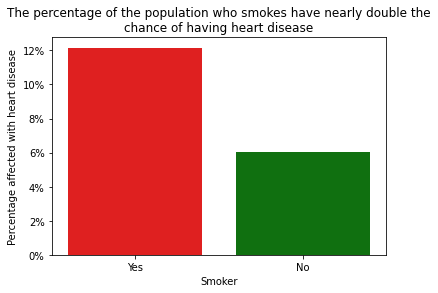

In [216]:
smokingPlot = sns.barplot(data = smokingDataFrame, x = "Smoking", y = "PercentageHeartDisease", palette = ["red" if value == "Yes" else "green" for value in smokingDataFrame.Smoking])

smokingPlot.set_xlabel("Smoker")
smokingPlot.set_ylabel("Percentage affected with heart disease")
smokingPlot.set_title("The percentage of the population who smokes have nearly double the\nchance of having heart disease")
smokingPlot.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

#### Over 12% of smokers suffer from heart disease while just over 6% of those who don't smoke suffer from heart disease.

#### Does a combination of poor health habits increase the risk for heart disease more than just one  poor health habit?

In [217]:
poorHabitsDataFrame = heartDataFrame[["HeartDisease", "Smoking", "AlcoholDrinking", "PhysicalActivity"]]

for column in ["Smoking", "AlcoholDrinking"]:
    poorHabitsDataFrame[column] = poorHabitsDataFrame[column].replace("Yes", 1)
    poorHabitsDataFrame[column] = poorHabitsDataFrame[column].replace("No", 0)
    
poorHabitsDataFrame["PhysicalActivity"] = poorHabitsDataFrame["PhysicalActivity"].replace("Yes", 0)
poorHabitsDataFrame["PhysicalActivity"] = poorHabitsDataFrame["PhysicalActivity"].replace("No", 1)

poorHabitsDataFrame["PoorHabits"] = poorHabitsDataFrame["Smoking"]+poorHabitsDataFrame["AlcoholDrinking"]+poorHabitsDataFrame["PhysicalActivity"]
poorHabitsDataFrame = poorHabitsDataFrame[["HeartDisease", "PoorHabits"]]

totalDataFrame = pd.DataFrame(columns=["PoorHabitsCount", "Percentage"])

for response in [0, 1, 2, 3]:
    currentDataFrame = poorHabitsDataFrame[newPoorHabitsDataFrame["PoorHabits"] == response]

    yesCount = len(currentDataFrame[currentDataFrame["HeartDisease"] == "Yes"])
    noCount = len(currentDataFrame[currentDataFrame["HeartDisease"] == "No"])
    totalCount = yesCount+noCount
    percentageYes = yesCount/totalCount
    
    totalDataFrame.loc[len(totalDataFrame)] = [str(response), percentageYes]

C:\Users\codyk\AppData\Local\Temp\ipykernel_23832\1436047906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poorHabitsDataFrame[column] = poorHabitsDataFrame[column].replace("Yes", 1)
C:\Users\codyk\AppData\Local\Temp\ipykernel_23832\1436047906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poorHabitsDataFrame[column] = poorHabitsDataFrame[column].replace("No", 0)
C:\Users\codyk\AppData\Local\Temp\ipykernel_23832\1436047906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [218]:
totalDataFrame

,PoorHabitsCount,Percentage
0,0,0.051962
1,1,0.101774
2,2,0.147297
3,3,0.109515


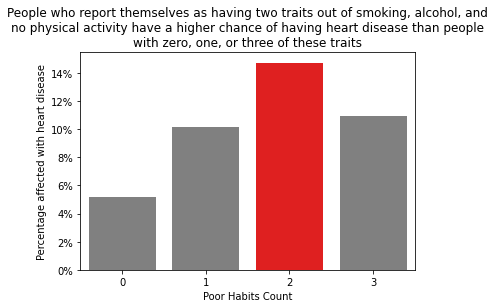

In [219]:
totalPlot = sns.barplot(data = totalDataFrame, x = "PoorHabitsCount", y = "Percentage", palette = ["red" if value == "2" else "gray" for value in totalDataFrame.PoorHabitsCount])

totalPlot.set_xlabel("Poor Habits Count")
totalPlot.set_ylabel("Percentage affected with heart disease")
totalPlot.set_title("People who report themselves as having two traits out of smoking, alcohol, and\nno physical activity have a higher chance of having heart disease than people\nwith zero, one, or three of these traits")
totalPlot.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

#### Those with two poor health habits have a higher chance of having heart disease than any other group with over 14% of people in this group suffering from it.

#### Which poor health habit has the worse effect on heart disease risk?

In [220]:
comparisonDataFrame = pd.DataFrame(columns=["PoorHabit", "Percentage"])

for habit in ["Smoking", "AlcoholDrinking", "PhysicalActivity"]:
    currentDataFrame = heartDataFrame[heartDataFrame[habit] == "Yes"]

    yesCount = len(currentDataFrame[currentDataFrame["HeartDisease"] == "Yes"])
    noCount = len(currentDataFrame[currentDataFrame["HeartDisease"] == "No"])
    totalCount = yesCount+noCount
    percentageYes = yesCount/totalCount
    
    if habit == "AlcoholDrinking":
        habit = "Alcohol Drinking"
    
    if habit == "PhysicalActivity":
        habit = "No Physical Activity"
    
    comparisonDataFrame.loc[len(comparisonDataFrame)] = [habit, percentageYes]

In [221]:
comparisonDataFrame

,PoorHabit,Percentage
0,Smoking,0.121577
1,Alcohol Drinking,0.052395
2,No Physical Activity,0.070532


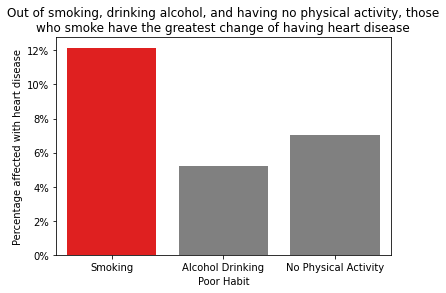

In [222]:
comparisonPlot = sns.barplot(data = comparisonDataFrame, x = "PoorHabit", y = "Percentage", palette = ["red" if value == "Smoking" else "gray" for value in comparisonDataFrame.PoorHabit])

comparisonPlot.set_xlabel("Poor Habit")
comparisonPlot.set_ylabel("Percentage affected with heart disease")
comparisonPlot.set_title("Out of smoking, drinking alcohol, and having no physical activity, those\nwho smoke have the greatest change of having heart disease") 
comparisonPlot.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

#### People who smoke have a higher percentage of having heart disease than people who drink alcohol or people who have no physical activity.

#### What BMIs are seen the most in people with heart disease?

Text(0.5, 1.0, 'The median BMI of those with heart disease is only slightly higher\nthan the median BMI of those without heart disease')

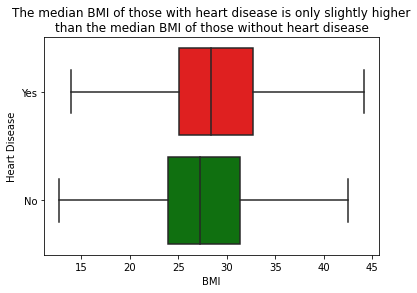

In [223]:
BMIPlot = sns.boxplot(data = heartDataFrame, x = "BMI", y = "HeartDisease", palette = ["red", "green"], order = ["Yes", "No"], showfliers = False)

BMIPlot.set_ylabel("Heart Disease")
BMIPlot.set_title("The median BMI of those with heart disease is only slightly higher\nthan the median BMI of those without heart disease")

#### The range of BMIs of people with heart disease falls a few points above that of the range of BMIs of people without heart disease.

#### Dataset from https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease